In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az

In [3]:
az.style.use('arviz-darkgrid')

In [4]:
μ = 0.
σ = 1.
X = stats.norm(μ, σ)
x = X.rvs(3)
x

array([1.87072776, 0.14754368, 0.9729321 ])

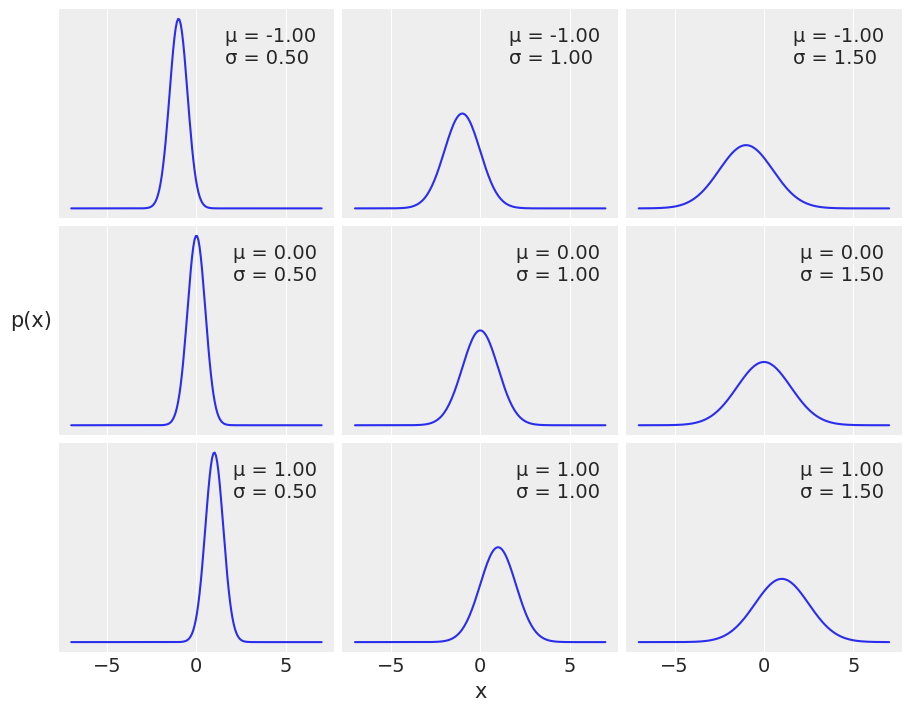

In [6]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7 , 7, 200)
#plt.subplot(nrows, ncols,*, sharex=False, sharey=False, squeeze=True, figsize=(*,*) ) returns a figure fig and axes or array of axes ax
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True, figsize=(9,7), constrained_layout=True)

for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])
plt.savefig('B11197_01_01.png', dpi=300);


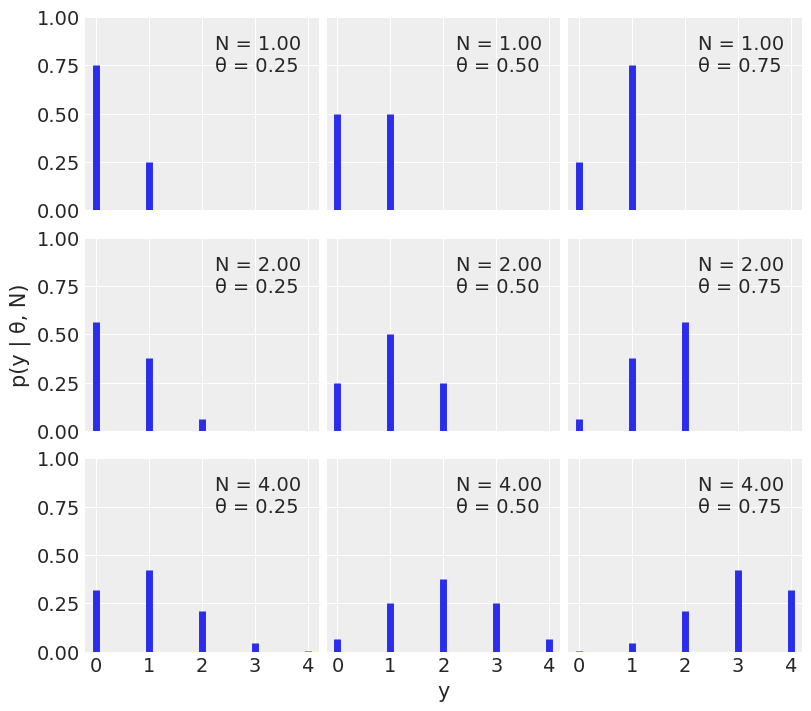

In [8]:
n_params = [1, 2, 4]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success

x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True,
                    figsize=(8, 7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = stats.binom(n=n, p=p).pmf(x)

        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()

        ax[2,1].set_xlabel('y')
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x) #graduation of x axes
plt.savefig('B11197_01_03.png', dpi=300)

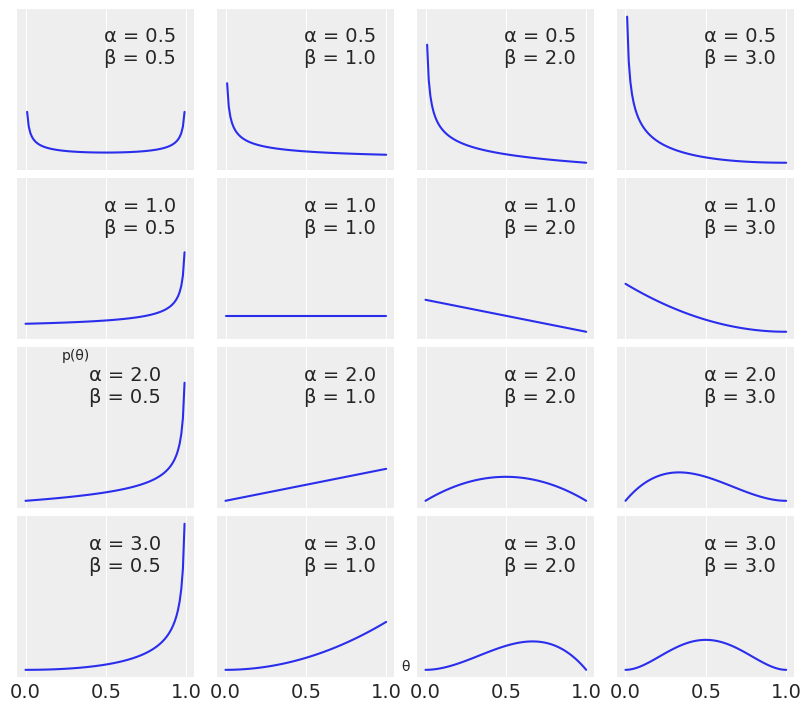

In [9]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True,
                     figsize=(8, 7), constrained_layout=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a, b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)
plt.savefig('B11197_01_04.png', dpi=300)

C:\Users\bomyr\AppData\Local\Temp\ipykernel_28716\2645315071.py:29: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


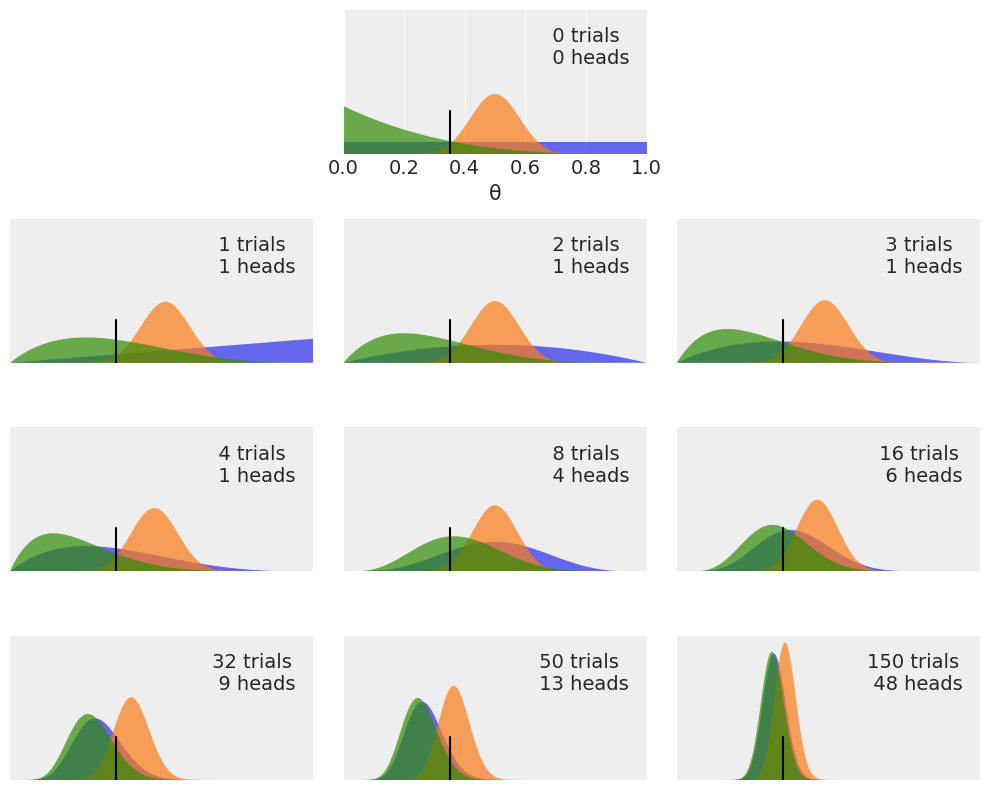

In [10]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()
plt.savefig('B11197_01_05.png', dpi=300)

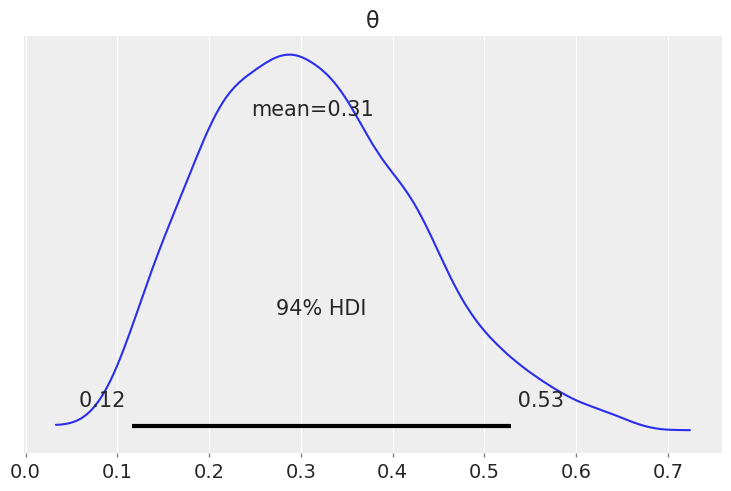

In [11]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})
plt.savefig('B11197_01_07.png', dpi=300)

C:\Users\bomyr\AppData\Local\Temp\ipykernel_28716\3468502544.py:33: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


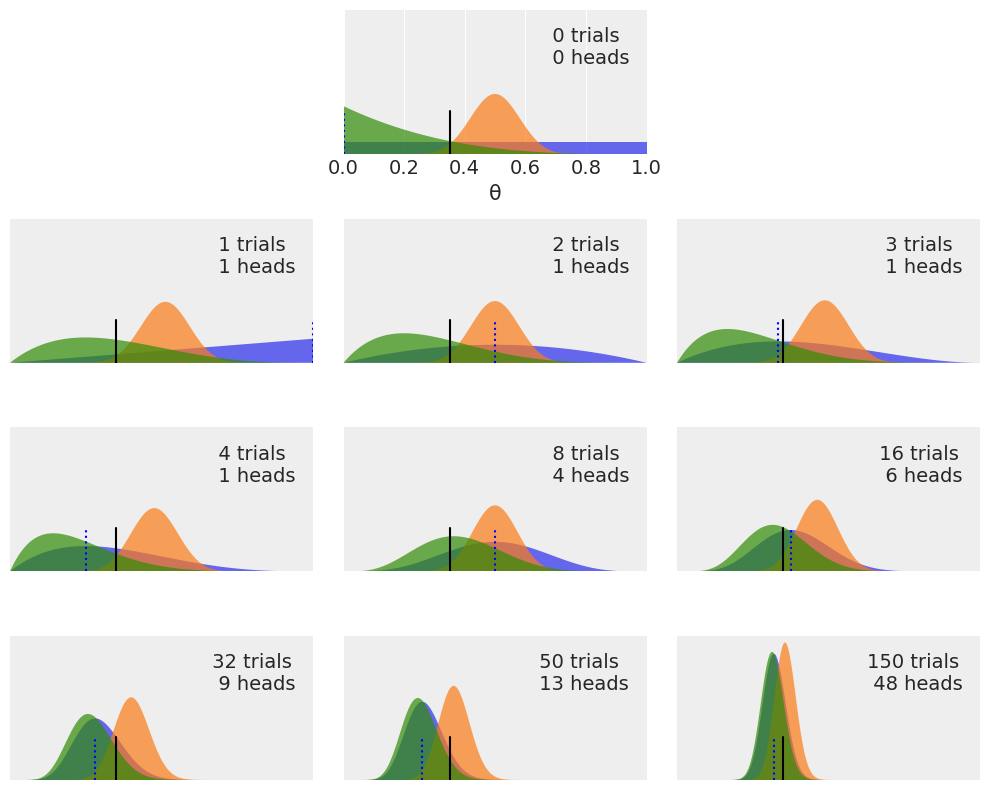

In [12]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    if idx == 0:
        plt.axvline(0, ymax=0.3, color='b', ls=':')
    else:
        plt.axvline(y/N, ymax=0.3, color='b', ls=':')        
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()
plt.savefig('B11197_01_05.png', dpi=300)

C:\Users\bomyr\AppData\Local\Temp\ipykernel_28716\2582291993.py:33: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


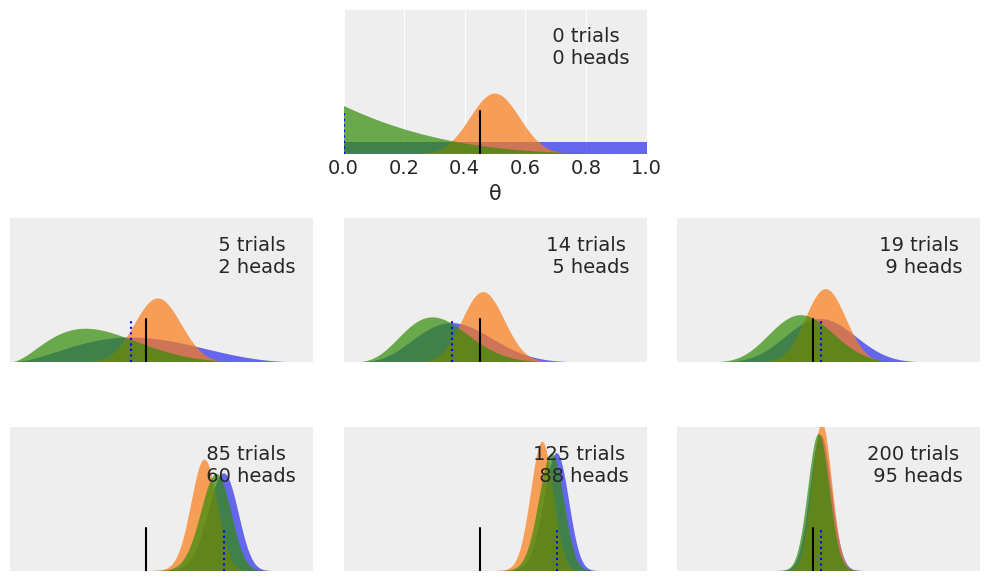

In [13]:
plt.figure(figsize=(10, 8))

n_trials = [0, 5, 14, 19, 85, 125, 200]
data = [0, 2, 5, 9, 60, 88, 95]
theta_real = 0.45

beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    if idx == 0:
        plt.axvline(0, ymax=0.3, color='b', ls=':')
    else:
        plt.axvline(y/N, ymax=0.3, color='b', ls=':')        
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()
plt.savefig('B11197_01_05.png', dpi=300)

In [1]:
conda install arviz


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bomyr\miniconda3

  added / updated specs:
    - arviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.11.2               |     pyhd3eb1b0_0         1.3 MB
    bottleneck-1.3.4           |   py39h080aedc_0         109 KB
    cftime-1.5.1.1             |   py39h080aedc_0         148 KB
    conda-4.13.0               |   py39haa95532_0         923 KB
    curl-7.82.0                |       h2bbff1b_0         140 KB
    hdf4-4.2.13                |       h712560f_2         1.3 MB
    hdf5-1.10.6                |       h7ebc959_0         7.9 MB
    kiwisolver-1.4.2           |   py39hd77b12b_0          58 KB
    libcurl-7.82.0             |       h86230a

pandas-1.4.2         | 8.7 MB    | #######1   |  72% 
pandas-1.4.2         | 8.7 MB    | #######2   |  73% 
pandas-1.4.2         | 8.7 MB    | #######3   |  73% 
pandas-1.4.2         | 8.7 MB    | #######3   |  74% 
pandas-1.4.2         | 8.7 MB    | #######4   |  74% 
pandas-1.4.2         | 8.7 MB    | #######4   |  75% 
pandas-1.4.2         | 8.7 MB    | #######5   |  75% 
pandas-1.4.2         | 8.7 MB    | #######5   |  76% 
pandas-1.4.2         | 8.7 MB    | #######6   |  76% 
pandas-1.4.2         | 8.7 MB    | #######6   |  77% 
pandas-1.4.2         | 8.7 MB    | #######7   |  77% 
pandas-1.4.2         | 8.7 MB    | #######7   |  78% 
pandas-1.4.2         | 8.7 MB    | #######8   |  79% 
pandas-1.4.2         | 8.7 MB    | #######9   |  79% 
pandas-1.4.2         | 8.7 MB    | #######9   |  80% 
pandas-1.4.2         | 8.7 MB    | ########   |  80% 
pandas-1.4.2         | 8.7 MB    | ########   |  81% 
pandas-1.4.2         | 8.7 MB    | ########1  |  81% 
pandas-1.4.2         | 8.7 M